# Séries Temporais

In [47]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

## Exploração de Dados

In [48]:
dataset = pd.read_csv('/Users/gustavomeira/Documents/Python/Estudo_ML/projects/Séries Temporais/AirPassengers.csv')
display(dataset.tail())

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [49]:
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset = dataset.set_index('Month')
display(dataset.tail())

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [50]:
time_series = dataset['#Passengers']
display(time_series)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

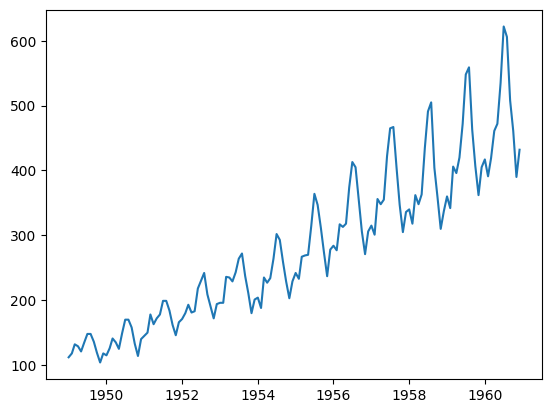

In [51]:
plt.plot(time_series);

/var/folders/nt/5c9y96096y722j4fgxzpzkc00000gn/T/ipykernel_23426/3134136164.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  time_series_ano = time_series.resample('A').sum();


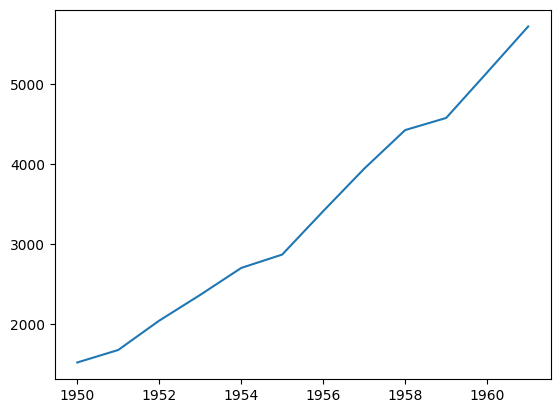

In [52]:
time_series_ano = time_series.resample('A').sum();
plt.plot(time_series_ano);

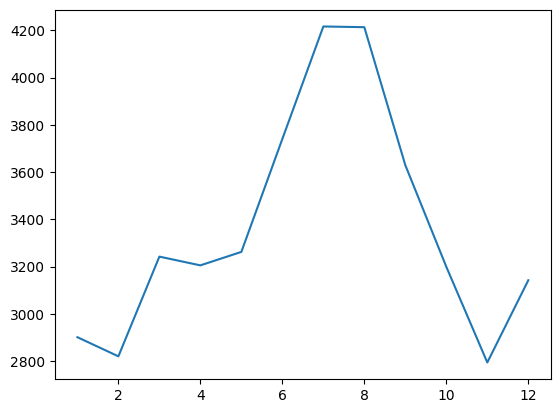

In [53]:
time_series_mes = time_series.groupby([lambda x: x.month]).sum()
plt.plot(time_series_mes);

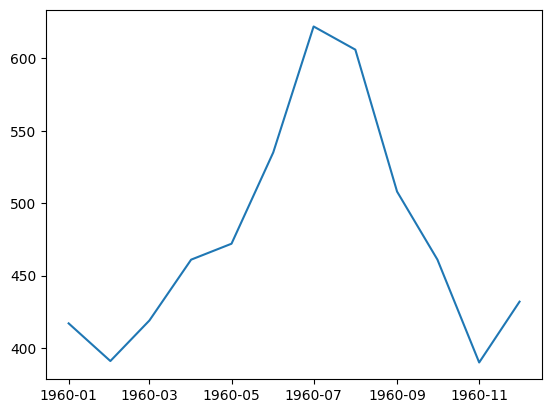

In [54]:
time_series_mes = time_series['1960-01-01':'1960-12-01']
plt.plot(time_series_mes);

## Decomposição da Série Temporal

In [55]:
decomposicao = seasonal_decompose(time_series)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

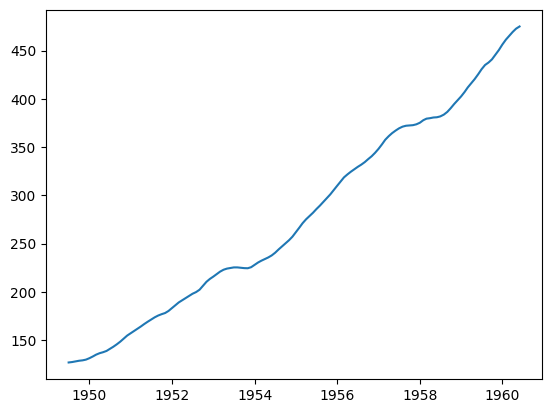

In [56]:
plt.plot(tendencia);

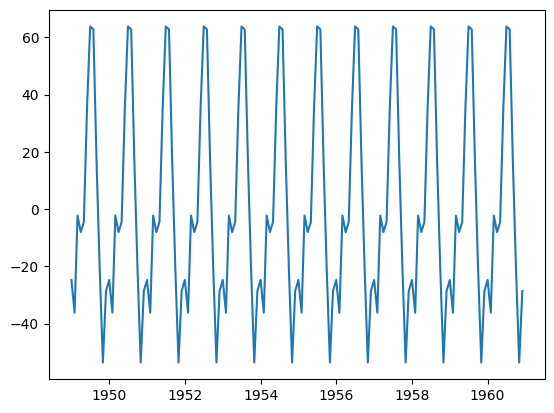

In [57]:
plt.plot(sazonal);

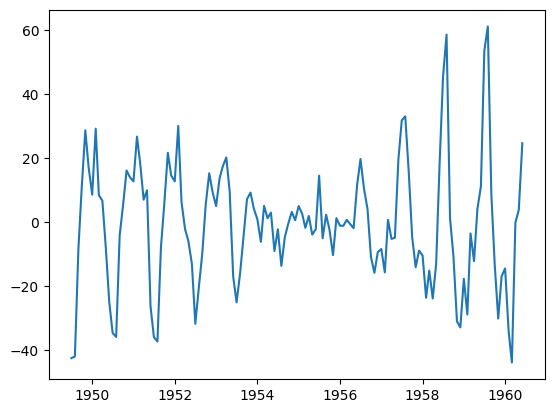

In [58]:
plt.plot(aleatorio);

## Previsão com ARIMA

In [59]:
# ARIMA (P, Q, D)
model = auto_arima(time_series)

predictions = model.predict(n_periods=24)
display(predictions)

1961-01-01    467.573731
1961-02-01    490.494467
1961-03-01    509.136864
1961-04-01    492.554714
1961-05-01    495.305982
1961-06-01    475.947821
1961-07-01    476.339871
1961-08-01    475.552148
1961-09-01    472.353807
1961-10-01    483.889654
1961-11-01    475.570152
1961-12-01    485.921520
1962-01-01    479.133608
1962-02-01    480.987429
1962-03-01    482.221407
1962-04-01    476.211025
1962-05-01    483.942824
1962-06-01    475.847352
1962-07-01    482.794259
1962-08-01    479.011959
1962-09-01    479.518631
1962-10-01    482.449456
1962-11-01    476.973943
1962-12-01    483.511025
Freq: MS, dtype: float64

In [60]:
display(len(time_series))

train = time_series[:130]
display(train.shape)
display(train.index.min(), train.index.max())

test = time_series[130:]
display(test.shape)
display(test.index.min(), test.index.max())

144

(130,)

Timestamp('1949-01-01 00:00:00')

Timestamp('1959-10-01 00:00:00')

(14,)

Timestamp('1959-11-01 00:00:00')

Timestamp('1960-12-01 00:00:00')

In [61]:
model2 = auto_arima(train, suppress_warnings=True)

prediction = pd.DataFrame(model2.predict(n_periods=14), index=test.index)
prediction.columns = ['passengers_predictions']
display(prediction)

,passengers_predictions
Month,
1959-11-01,357.690515
1959-12-01,334.857456
1960-01-01,342.488598
1960-02-01,375.944533
1960-03-01,424.126287
1960-04-01,473.151442
1960-05-01,510.388376
1960-06-01,527.724241
1960-07-01,523.268330


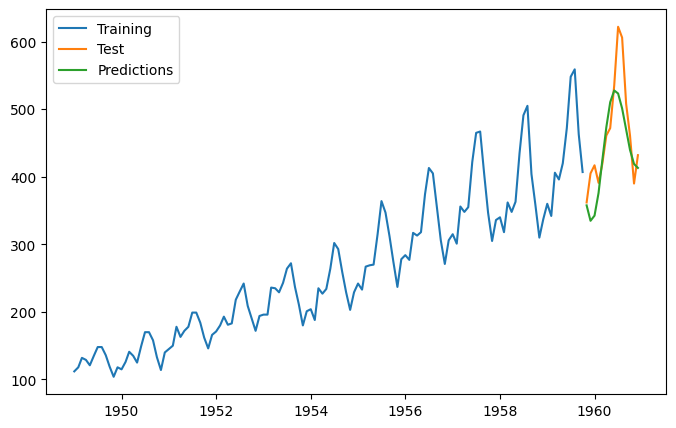

In [62]:
plt.figure(figsize=(8,5))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(prediction,label='Predictions')
plt.legend()
plt.show();

## Prophet

In [63]:
!pip install pystan
!pip install prophet

In [64]:
from prophet import Prophet

dataset = pd.read_csv('/Users/gustavomeira/Documents/Python/Estudo_ML/projects/Séries Temporais/page_wikipedia.csv')
display(dataset.tail())

,date,views
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [65]:
display(dataset.describe())

,views
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


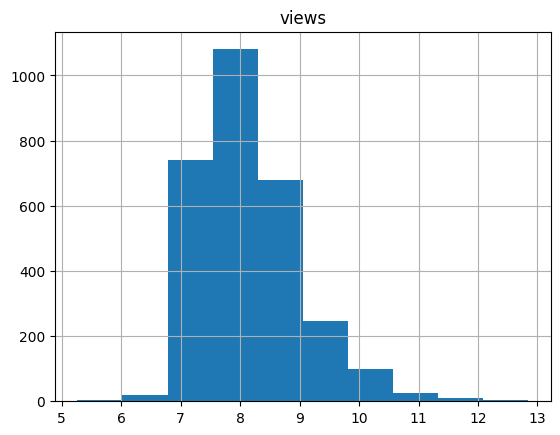

In [66]:
dataset.hist();

In [67]:
dataset = dataset[['date','views']].rename(columns={'date':'ds','views':'y'})
dataset = dataset.sort_values(by='ds')

In [68]:
model = Prophet()
model.fit(dataset)

future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

16:31:48 - cmdstanpy - INFO - Chain [1] start processing
16:31:51 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
display(forecast.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2990,2016-04-15,7.470884,6.295129,7.540654,7.447524,7.501061,-0.560898,-0.560898,-0.560898,-0.069571,-0.069571,-0.069571,-0.491327,-0.491327,-0.491327,0.0,0.0,0.0,6.909986
2991,2016-04-16,7.469857,6.061604,7.303273,7.446054,7.500465,-0.772955,-0.772955,-0.772955,-0.311716,-0.311716,-0.311716,-0.461239,-0.461239,-0.461239,0.0,0.0,0.0,6.696902
2992,2016-04-17,7.468831,6.456138,7.688848,7.444048,7.499870,-0.383260,-0.383260,-0.383260,0.048289,0.048289,0.048289,-0.431550,-0.431550,-0.431550,0.0,0.0,0.0,7.085571
2993,2016-04-18,7.467805,6.767873,8.030717,7.442536,7.499441,-0.050718,-0.050718,-0.050718,0.352282,0.352282,0.352282,-0.403000,-0.403000,-0.403000,0.0,0.0,0.0,7.417087
2994,2016-04-19,7.466779,6.586427,7.862446,7.440845,7.498907,-0.256652,-0.256652,-0.256652,0.119636,0.119636,0.119636,-0.376288,-0.376288,-0.376288,0.0,0.0,0.0,7.210127


In [70]:
display(len(dataset), len(forecast))

2905

2995

/Users/gustavomeira/.pyenv/versions/3.12.0/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/gustavomeira/.pyenv/versions/3.12.0/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


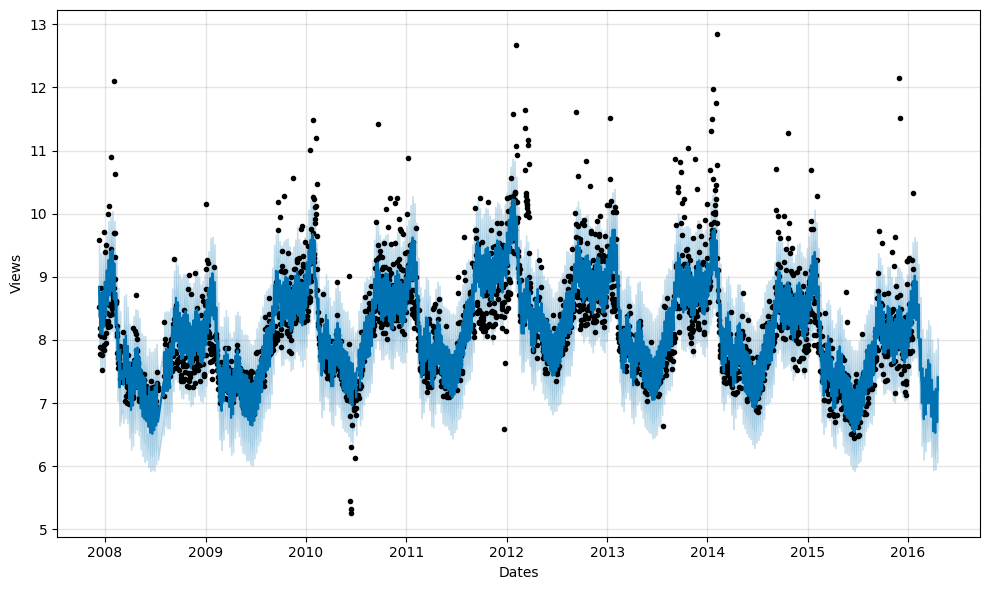

In [71]:
model.plot(forecast, xlabel='Dates', ylabel='Views');

/Users/gustavomeira/.pyenv/versions/3.12.0/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/gustavomeira/.pyenv/versions/3.12.0/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/gustavomeira/.pyenv/versions/3.12.0/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series contain

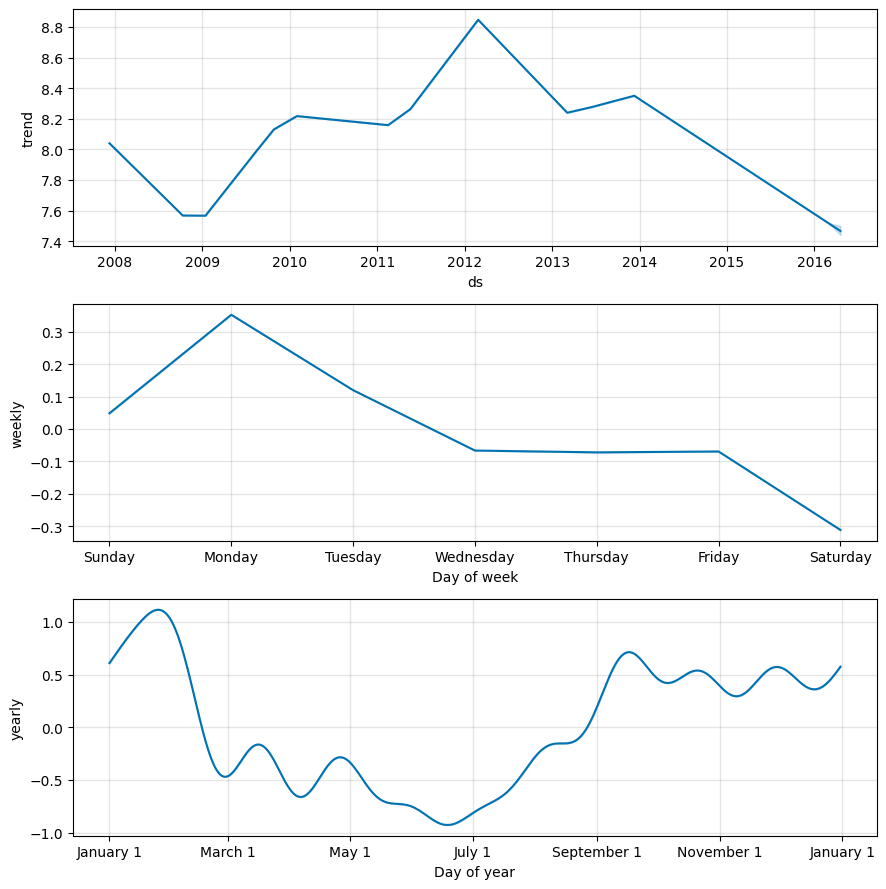

In [72]:
model.plot_components(forecast);

In [77]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [76]:
plot_components_plotly(model, forecast)